# Classificador de Risco (TF‑IDF + LogisticRegression)
Este notebook treina um modelo simples para classificar frases como **alto risco** ou **baixo risco**.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Carrega dataset (deixe este .ipynb na mesma pasta do CSV)
csv_path = 'frases_risco.csv'
df = pd.read_csv(csv_path, sep=';', encoding='latin-1') # Added encoding='latin-1' and sep=';'
print(df['situacao'].value_counts())
df.head()

situacao
alto risco     10
baixo risco    10
Name: count, dtype: int64


,frase,situacao
0,dor no peito que nao melhora em repouso,alto risco
1,falta de ar grave ao deitar e inchar pernas,alto risco
2,falta de ar subita com dor ao inspirar,alto risco
3,dor no peito em aperto irradiando para o braco...,alto risco
4,dor no peito acompanhada de nauseas e vomitos,alto risco


In [4]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    df['frase'], df['situacao'], test_size=0.25, random_state=42, stratify=df['situacao']
)

# TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape, len(vectorizer.get_feature_names_out())

((15, 141), 141)

In [5]:
# Treino
clf = LogisticRegression(max_iter=400)
clf.fit(X_train_vec, y_train)

# Avaliação
pred = clf.predict(X_test_vec)
acc = accuracy_score(y_test, pred)
print(f"Acurácia: {acc:.3f}")
print(classification_report(y_test, pred))

Acurácia: 0.600
              precision    recall  f1-score   support

  alto risco       0.67      0.67      0.67         3
 baixo risco       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



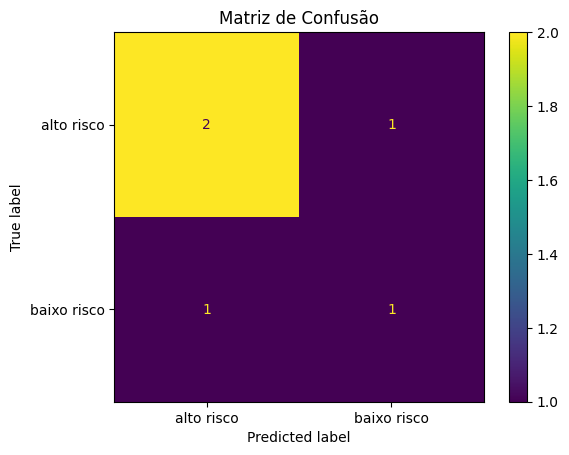

In [6]:
# Matriz de confusão
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot()
plt.title("Matriz de Confusão")
plt.show()

### Como testar novas frases
Use `vectorizer.transform(["sua frase"])` e `clf.predict(...)`.

Distribuição das classes:
 situacao
alto risco     10
baixo risco    10
Name: count, dtype: int64

Exemplo das primeiras linhas:
                                                frase    situacao
0            dor no peito que nao melhora em repouso  alto risco
1        falta de ar grave ao deitar e inchar pernas  alto risco
2             falta de ar subita com dor ao inspirar  alto risco
3  dor no peito em aperto irradiando para o braco...  alto risco
4      dor no peito acompanhada de nauseas e vomitos  alto risco 

Tamanho da matriz de treino: (15, 141)
Número de features TF-IDF: 141

Acurácia: 0.600

Relatório de classificação:
               precision    recall  f1-score   support

  alto risco       0.67      0.67      0.67         3
 baixo risco       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



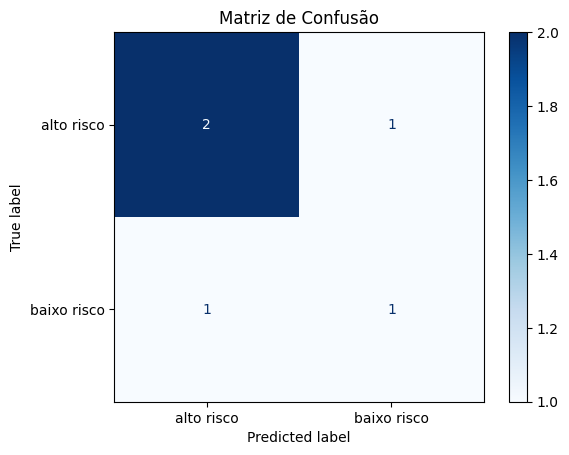

Frase: Sinto dor forte no peito e falta de ar -> Risco: alto risco
Frase: Dor leve no peito que passa com repouso -> Risco: baixo risco
Frase: Palpitações rápidas e tontura -> Risco: baixo risco


In [7]:
# -*- coding: utf-8 -*-
# Classificador de Risco (TF-IDF + LogisticRegression) – Versão corrigida para Colab
# Este notebook treina um modelo simples para classificar frases como "alto risco" ou "baixo risco".
# Ele lida corretamente com acentos, cedilhas e CSV com separador ';'.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# ================================
# 1) Carregar dataset
# ================================
csv_path = 'frases_risco.csv'  # faça upload do arquivo no Colab antes de rodar
df = pd.read_csv(csv_path, sep=';', encoding='latin1')  # corrigido para encoding Latin-1

print("Distribuição das classes:\n", df['situacao'].value_counts())
print("\nExemplo das primeiras linhas:\n", df.head(), "\n")

# ================================
# 2) Split treino/teste
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    df['frase'], df['situacao'], test_size=0.25, random_state=42, stratify=df['situacao']
)

# ================================
# 3) Vetorização TF-IDF
# ================================
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=1)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f"Tamanho da matriz de treino: {X_train_vec.shape}")
print(f"Número de features TF-IDF: {len(vectorizer.get_feature_names_out())}\n")

# ================================
# 4) Treino do modelo
# ================================
clf = LogisticRegression(max_iter=400)
clf.fit(X_train_vec, y_train)

# ================================
# 5) Avaliação
# ================================
pred = clf.predict(X_test_vec)
acc = accuracy_score(y_test, pred)
print(f"Acurácia: {acc:.3f}\n")
print("Relatório de classificação:\n", classification_report(y_test, pred))

# ================================
# 6) Matriz de confusão
# ================================
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

# ================================
# 7) Testar novas frases
# ================================
novas_frases = [
    "Sinto dor forte no peito e falta de ar",
    "Dor leve no peito que passa com repouso",
    "Palpitações rápidas e tontura"
]

novas_vec = vectorizer.transform(novas_frases)
pred_novas = clf.predict(novas_vec)

for frase, r in zip(novas_frases, pred_novas):
    print(f"Frase: {frase} -> Risco: {r}")
